In [9]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import random

## reading Input.fasta

In [10]:
# Path to the input.fasta file
fasta_file = "input.fasta"

# Read all sequences from the fasta file
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Print the sequences
for seq in sequences:
    print(seq.id)
    print(seq.seq)


MINE01
AGGAACAGGATGAACAGTTTATCCCCCTCTTTCAAGAAATATTTCTCATAGAGGAGCTTCAGTTGACTTAAGAATCTTCAGATTACATTTAGCAGGATTCTCTTCAATCCTAGGAGCTATCAACTTCATTACAACTATTTTAAATATACGACCAAAAAACTTAAATCTAGAATTAATCCCTTTATTTGTATGATCTGTTCTAATCACAGCAATTTTATTATTACTTAGATTACCAGTCTTAGCAGCAGCTATTACCATACTTCTAACAGATCGTAATCTCAATACCTCATTTTTCGACCCTGCAGGTGGAGGAGACCCAATCCTTTACCAACACTTATTCTGATTTTTTGGTCACCCTGAAGTTTACATTCTTATTCTACCAGGATTTGGTATTATTTCTCACATTATCTCATTCCATAGAGGAAAAAAAAATCCTTTCGGAAATTTAGGTATAATCTATGCTATATTAACTATTGGAATTTTAGGATTCATTGTATGAGCTCATCACATATTCACTATTGGTCTTGATATTGATACT
MINE03
AGGAACAGGATGAACAGTTTATCCCCCTCTTTCAAGAAATATTTCTCATAGAGGAGCTTCAGTTGACTTAAGAATCTTCAGATTACATTTAGCAGGATTCTCTTCAATCCTAGGAGCTATCAACTTCATTACAACTATTTTAAATATACGACCAAAAAACTTAAATCTAGAATTAATCCCTTTATTTGTATGATCTGTTCTAATCACAGCAATTTTATTATTACTTAGATTACCAGTCTTAGCAGCAGCTATTACCATACTTCTAACAGATCGTAATCTCAATACCTCATTTTTCGACCCTGCAGGTGGAGGAGACCCAATCCTTTACCAACACTTATTCTGATTTTTTGGTCACCCTGAAGTTTACATTCTTATTCTACCAGGATTTGGTATTATTTCTCACATTATCTCATTCCATAGAGGAAAAAAAAATCCTTTCGGAAATTT

### Generate 20 random protein sequences of each sequences of input fiel at least 30% identical from input file input.fasta

In [11]:
def mutate_sequence(original_seq, identity_percent=30):
    seq_length = len(original_seq)
    num_mutations = int((100 - identity_percent) / 100 * seq_length)
    original_seq = list(original_seq)
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    
    for _ in range(num_mutations):
        index_to_mutate = random.randint(0, seq_length - 1)
        new_amino_acid = random.choice(amino_acids)  # Selecting a new amino acid
        while original_seq[index_to_mutate] == new_amino_acid:
            new_amino_acid = random.choice(amino_acids)
        original_seq[index_to_mutate] = new_amino_acid
    
    return ''.join(original_seq)


fasta_file = 'input.fasta'
sequences = list(SeqIO.parse(fasta_file, "fasta"))
new_records = []

for seq in sequences:
    for i in range(20):  # Generate 20 mutated sequences per original
        new_seq = mutate_sequence(seq.seq, identity_percent=70)  # Maintain 70% identity
        new_record = SeqRecord(Seq(new_seq), id=f"{seq.id}_mutated_{i+1}", description="")
        new_records.append(new_record)

output_file = 'output.fasta'
with open(output_file, 'w') as f:
    SeqIO.write(new_records, f, 'fasta')


# check for Alignment

In [12]:
#!/usr/bin/python3
def check_alignment(file):
    sequences = [str(record.seq) for record in SeqIO.parse(file, "fasta")]
    length = len(sequences[0])
    for seq in sequences:
        if len(seq) != length:
            return False
    return True

print(check_alignment("output.fasta"))

True


# check for semilarity
- compares each original sequence in the input file with its corresponding mutated versions in the output file

In [13]:
from Bio import SeqIO
from Bio.pairwise2 import align

# Read sequences from the input and output FASTA files
input_fasta_file = 'input.fasta'
output_fasta_file = 'output.fasta'
input_sequences = list(SeqIO.parse(input_fasta_file, "fasta"))
output_sequences = list(SeqIO.parse(output_fasta_file, "fasta"))

# Function to calculate similarity between two sequences
def calculate_similarity(seq1, seq2):
    alignments = align.globalxx(seq1.seq, seq2.seq)
    # Get the highest scoring alignment
    best_alignment = max(alignments, key=lambda x: x.score)
    # Calculate similarity percentage
    similarity = best_alignment.score / min(len(seq1.seq), len(seq2.seq)) * 100
    return similarity

# Mapping original sequences to their mutations
mutations_map = {}
for seq in output_sequences:
    original_id = seq.id.split('_mutated')[0]  # Assumes IDs are of the form "MINE01_mutated_1"
    if original_id not in mutations_map:
        mutations_map[original_id] = []
    mutations_map[original_id].append(seq)

# Compare each original sequence with its mutated versions
for original_seq in input_sequences:
    original_id = original_seq.id
    if original_id in mutations_map:
        for mutated_seq in mutations_map[original_id]:
            similarity = calculate_similarity(original_seq, mutated_seq)
            print(f"Similarity between {original_id} and {mutated_seq.id}: {similarity:.2f}%")


Similarity between MINE01 and MINE01_mutated_1: 75.09%
Similarity between MINE01 and MINE01_mutated_2: 75.28%
Similarity between MINE01 and MINE01_mutated_3: 75.84%
Similarity between MINE01 and MINE01_mutated_4: 75.84%
Similarity between MINE01 and MINE01_mutated_5: 75.84%
Similarity between MINE01 and MINE01_mutated_6: 75.09%
Similarity between MINE01 and MINE01_mutated_7: 75.28%
Similarity between MINE01 and MINE01_mutated_8: 78.07%
Similarity between MINE01 and MINE01_mutated_9: 73.61%
Similarity between MINE01 and MINE01_mutated_10: 76.21%
Similarity between MINE01 and MINE01_mutated_11: 75.46%
Similarity between MINE01 and MINE01_mutated_12: 75.28%
Similarity between MINE01 and MINE01_mutated_13: 76.02%
Similarity between MINE01 and MINE01_mutated_14: 74.72%
Similarity between MINE01 and MINE01_mutated_15: 76.02%
Similarity between MINE01 and MINE01_mutated_16: 73.61%
Similarity between MINE01 and MINE01_mutated_17: 76.02%
Similarity between MINE01 and MINE01_mutated_18: 74.91%
S

# Phylogenetic Tree Construction

This Python script uses the BioPython library to construct phylogenetic trees from a multiple sequence alignment in a FASTA file. The trees are constructed using the UPGMA (Unweighted Pair Group Method with Arithmetic Mean) and NJ (Neighbor Joining) methods.

## Requirements

- BioPython

## FILE

- for output file

In [14]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

# Read the sequences from the output fasta file
output_fasta_file = 'output.fasta'
sequences = list(AlignIO.read(output_fasta_file, "fasta"))

# Organize sequences into groups: one for each original and its mutations
groups = {}
for seq in sequences:
    group_id = seq.id.split('_mutated')[0]  # Get the base ID for grouping
    if group_id not in groups:
        groups[group_id] = []
    groups[group_id].append(seq)

# Calculate the distance matrix, construct trees, and draw them for each group
calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor()

# Set up matplotlib figures to display trees
# Each group needs two plots, one for UPGMA and one for NJ
fig, axes = plt.subplots(nrows=len(groups)*2, figsize=(10, 5 * len(groups)*2))  # Adjust size as needed

# Handle case with only one group separately
single_group = len(groups) == 1

for idx, (group_id, group_seqs) in enumerate(groups.items()):
    alignment = AlignIO.MultipleSeqAlignment(group_seqs)
    dm = calculator.get_distance(alignment)
    upgma_tree = constructor.upgma(dm)
    nj_tree = constructor.nj(dm)

    # Get the correct axes for the UPGMA and NJ trees
    ax1 = axes[idx*2] if not single_group else axes
    ax2 = axes[idx*2 + 1] if not single_group else axes

    # Draw UPGMA tree
    ax1.set_title(f'UPGMA Tree for {group_id}')
    Phylo.draw(upgma_tree, do_show=False, axes=ax1)

    # Draw NJ tree
    ax2.set_title(f'NJ Tree for {group_id}')
    Phylo.draw(nj_tree, do_show=False, axes=ax2)

plt.tight_layout()
plt.show()


- input

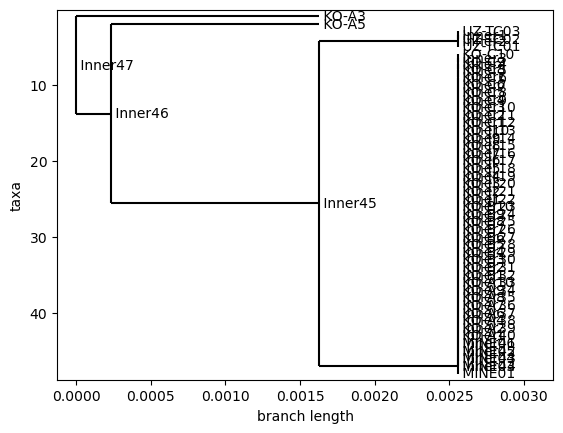

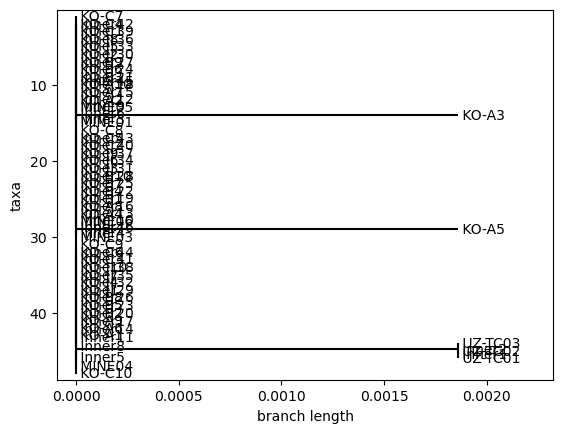

In [ ]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Read the fasta file and convert it into a dictionary
alignment = AlignIO.read('input.fasta', 'fasta')

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the phylogenetic tree using the UPGMA method
constructor = DistanceTreeConstructor()
upgma_tree = constructor.upgma(dm)

# Construct the phylogenetic tree using the Neighbor Joining method
nj_tree = constructor.nj(dm)

# Draw the UPGMA and NJ trees
Phylo.draw(upgma_tree)
Phylo.draw(nj_tree)


## Explanation

1. The script first reads a multiple sequence alignment from a FASTA file using the `AlignIO.read` function.

2. It then calculates a distance matrix from the alignment using the `DistanceCalculator` class with the 'identity' model, which calculates the proportion of mismatches between sequences.

3. The script constructs a phylogenetic tree from the distance matrix using the UPGMA method, which clusters sequences based on their pairwise distances.

4. The script also constructs a phylogenetic tree using the NJ method, which also uses pairwise distances but takes a different approach to clustering.

5. Finally, the script draws the UPGMA and NJ trees using the `Phylo.draw` function.

# Phylogenetic Tree Visualization

This Python script uses the BioPython and ETE Toolkit libraries to visualize phylogenetic trees. The trees are first constructed using the UPGMA (Unweighted Pair Group Method with Arithmetic Mean) and NJ (Neighbor Joining) methods, and then visualized using the ETE Toolkit.

## Requirements

- BioPython
- ETE Toolkit

In [ ]:
from ete3 import Tree, TreeStyle
from io import StringIO
from Bio import Phylo

# Add a root name to the trees
upgma_tree.root.name = "Root"
nj_tree.root.name = "Root"

# Remove internal node names
for clade in upgma_tree.find_clades():
    if not clade.is_terminal():
        clade.name = ""
for clade in nj_tree.find_clades():
    if not clade.is_terminal():
        clade.name = ""

# Convert the Bio.Phylo trees to Newick format and then to ETE trees
upgma_newick = StringIO()
Phylo.write(upgma_tree, upgma_newick, format="newick")
upgma_ete_tree = Tree(upgma_newick.getvalue())

nj_newick = StringIO()
Phylo.write(nj_tree, nj_newick, format="newick")
nj_ete_tree = Tree(nj_newick.getvalue())

# Create a TreeStyle object for customizing the tree's appearance
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

# Show the trees
upgma_ete_tree.show(tree_style=ts)
nj_ete_tree.show(tree_style=ts)



## Explanation

1. The script first adds a root name to the UPGMA and NJ trees.

2. It then removes the internal node names from the trees. This is done because the ETE Toolkit does not support internal node names in the Newick format.

3. The script converts the Bio.Phylo trees to Newick format and then to ETE trees. This is done using the `Phylo.write` function and the `Tree` class from the ETE Toolkit.

4. The script creates a `TreeStyle` object to customize the appearance of the trees. It sets the `show_leaf_name`, `show_branch_length`, and `show_branch_support` attributes to `True` to display the leaf names, branch lengths, and branch support values, respectively.

5. Finally, the script displays the trees using the `show` method of the `Tree` class. The `tree_style` parameter is set to the `TreeStyle` object to apply the custom appearance.
